In [1]:
import torch
import torch.nn as nn
import numpy as np
from universalNet import universalNet
from universalNet_utils import n_hot_patterns
import matplotlib.pyplot as plt

In [2]:
# Initialize network
hparams = {'seed': 42,
           'dales_law': True}

params_dict = {'layer0': 
                   {'E': {'n': 7}
                   },
               'layer1':
                   {'E': {'n': 21,
                          'activation': 'softplus',
                          'bias': True,
                          'bias_rule': 'backprop',
                          'tau': 2,
                          'inputs': {'layer0.E': {'distribution': 'uniform',
                                                  'bounds': (0,1),
                                                  'direction': 'FF',
                                                  'learning_rule': 'backprop'},
#                                      'layer1.I': {'bounds': (-1,0),
#                                                   'direction': 'FB'}
                                    }
                         },
#                     'I': {'n': 1,
#                           'inputs':{'layer1.E': {'bounds': (0,1)}
#                                    }
#                          }
                   }
              }

model = universalNet(params_dict, **hparams)

100%|██████████| 100/100 [00:03<00:00, 30.10it/s]


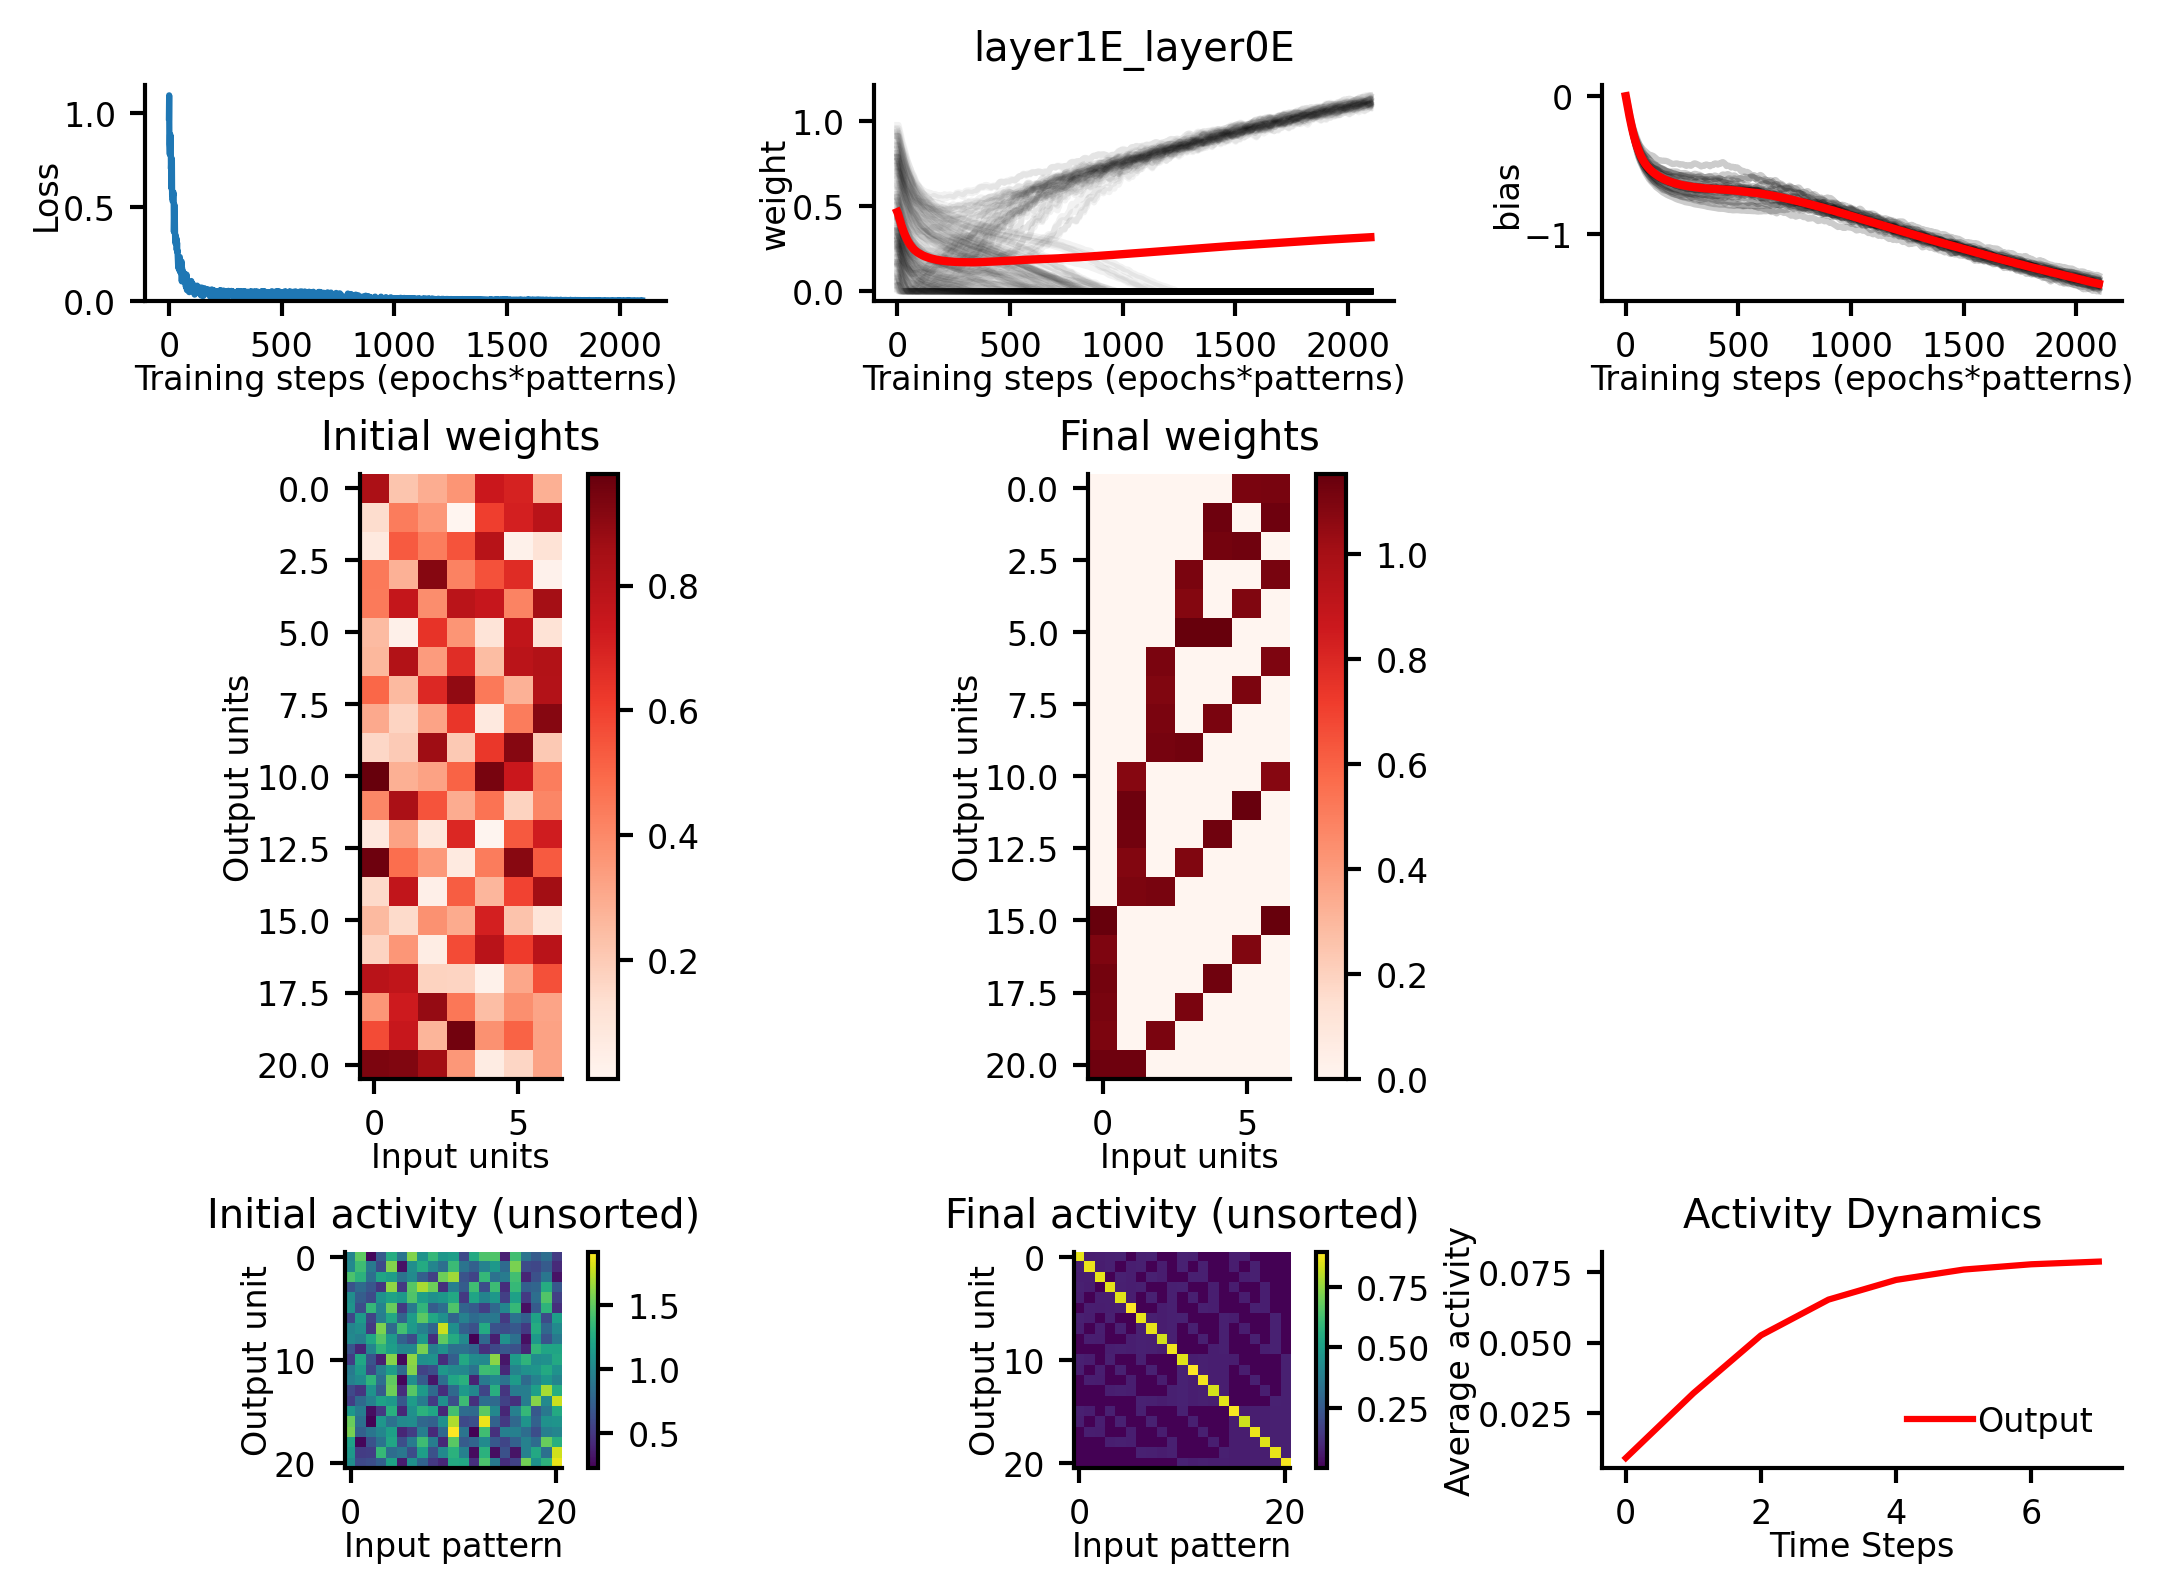

In [3]:
# Train network
all_patterns = n_hot_patterns(n=2,length=7)
all_targets = torch.eye(21)

model.train(num_epochs = 100,
            all_patterns = all_patterns,
            all_targets = all_targets,
            lr = 0.01,
            num_timesteps = 8,
            num_BPTT_steps = 8,
            plot = True)